In [220]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

name = "fibro"
topfolder = f"imitations_{name}"
er_out = []
folder = f"{topfolder}/ER/"
for i in os.listdir(folder):
    er_out.append(json.load(open(folder+i)))

om_out = []
folder = f"{topfolder}/OM/"
for i in os.listdir(folder):
    om_out.append(json.load(open(folder+i)))
    
cm_out = []
folder = f"{topfolder}/CM/"
for i in os.listdir(folder):
    cm_out.append(json.load(open(folder+i)))

In [221]:
color_scheme = {"Jasmine":"#ffd07b",
                "Glaucous":"#577399",
                "Dark purple":"#412234",
                "Moss green":"#748e54",
                "Keppel":"#44bba4"
               }


color_dict = {
"immune":  color_scheme["Keppel"],
"fibro":   color_scheme["Glaucous"],
"gene":    color_scheme["Moss green"],
"lipid":   color_scheme["Jasmine"],
"soil":    color_scheme["Dark purple"],
"gene_alt":color_scheme["Moss green"]
}


In [222]:
true = json.load(open(f"{topfolder}/true.json"))

In [223]:
fontsize = 20

TypeError: 'FigureCanvasAgg' object is not callable

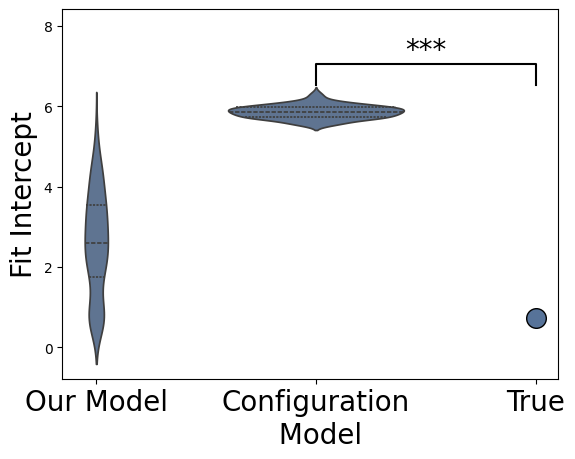

In [227]:
import seaborn as sns
color = color_dict[name]
fig,ax = plt.subplots()
sns.violinplot([[d['fitter_w'] for d in om_out],[d['fitter_w'] for d in cm_out]],color=color,inner="quart")
ax.scatter([2],[true['fitter_w']],c=color,s=200,edgecolor='k')
#ax.set_xlabel(")

fontsize = 20
ax.set_ylabel("Fit Intercept",fontsize=fontsize)
ax.set_xticks([0,1,2])
ax.set_xticklabels(["Our Model", "Configuration\n Model", "True"],fontsize=fontsize)

# statistical annotation
x1, x2 = 1,2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = np.max([d['fitter_w'] for d in cm_out]) + 0.2, 0.5, 'k'

test = scipy.stats.ttest_ind(true['fitter_w'],np.array([d['fitter_w'] for d in cm_out]))

if test.pvalue < 0.001:
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,fontsize=fontsize)

elif test.pvalue < 0.01:
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col,fontsize=fontsize)
    
elif test.pvalue < 0.05:
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,fontsize=fontsize)

ymin,ymax = ax.get_ylim()
ax.set_ylim((ymin,ymax+1))
#ax.axis("tight")
fig.savefig(f"{name}_comparison.png", dpi=500)

fp = open(f"{name}_pvalue.txt", 'w')
fp.write(str(test.pvalue))
fp.close()


In [225]:
test = scipy.stats.ttest_ind(true['fitter_w'],np.array([d['fitter_w'] for d in cm_out]))

https://faq.edqm.eu/pages/viewpage.action?pageId=1377305
    
If a p-value is less than 0.05, it is flagged with one star (*). 

If a p-value is less than 0.01, it is flagged with 2 stars (**). 

If a p-value is less than 0.001, it is flagged with three stars (***). 